<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-предобработка" data-toc-modified-id="Загрузка-данных-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и предобработка</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Общее-исследование-данных." data-toc-modified-id="Общее-исследование-данных.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общее исследование данных.</a></span></li><li><span><a href="#Изучение-средних-величин-с-разбивкой-на-отток/неотток." data-toc-modified-id="Изучение-средних-величин-с-разбивкой-на-отток/неотток.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение средних величин с разбивкой на отток/неотток.</a></span></li><li><span><a href="#Гистограммы-для-признаков-с-разбивкой-отток/удержание." data-toc-modified-id="Гистограммы-для-признаков-с-разбивкой-отток/удержание.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Гистограммы для признаков с разбивкой отток/удержание.</a></span></li><li><span><a href="#точечные-гистограммы-признаков.-Проверка-на-аномалии." data-toc-modified-id="точечные-гистограммы-признаков.-Проверка-на-аномалии.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>точечные гистограммы признаков. Проверка на аномалии.</a></span></li><li><span><a href="#Корреляции-признаков-и-тепловая-карта." data-toc-modified-id="Корреляции-признаков-и-тепловая-карта.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Корреляции признаков и тепловая карта.</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов.-Линейная-регрессия." data-toc-modified-id="Модель-прогнозирования-оттока-клиентов.-Линейная-регрессия.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов. Линейная регрессия.</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов.-Случайный-лес." data-toc-modified-id="Модель-прогнозирования-оттока-клиентов.-Случайный-лес.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов. Случайный лес.</a></span></li><li><span><a href="#Кластеризация-клиентов.-Алгоритм-K-Means." data-toc-modified-id="Кластеризация-клиентов.-Алгоритм-K-Means.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов. Алгоритм K-Means.</a></span></li><li><span><a href="#Вывод-по-исследованию." data-toc-modified-id="Вывод-по-исследованию.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод по исследованию.</a></span></li></ul></div>

# Разработка стратегии взаимодействия с клиентами на основе аналитических данных для фитнесс-центра. 

Цели проекта:
Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

## Загрузка данных и предобработка

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/datasets/gym_churn.csv')
df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
#привел названия столбцов к змеиному регистру
df.columns=[str.lower(x) for x in df.columns]

In [4]:
#размер таблицы 4000 наблюдений и 14 столбцов 
df.shape

(4000, 14)

In [5]:
#судя по всему пропуски отсутствуют
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
#дубликатов и пропусков нет
df.isna().sum()
df.duplicated().sum()

0

В ходе предобработки данных не были выявленны пропуски и дубликаты. Типы данных столбцов соответствуют целям исследования и применяемым методам и алгоритмам. Названия столбцов были приведены к змеиному регистру.

## Исследовательский анализ данных.

### Общее исследование данных.


In [7]:
df.describe().round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Изучив максимальные/среднии значения, а так же стандартное отклонение. Пришел к выводу что ярких аномалий в столбцах с небулевыми значениями нет. Собираюсь на графиках распределения это подтвердить. Так же исходя из средней столбца churn могу сделать вывод, что отток произошел в 27% случаев.

### Изучение средних величин с разбивкой на отток/неотток.

In [8]:
df.groupby('churn').mean().round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.9,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.9,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


Выводы которые можно сделать:
- половая принадлежность не влияет на отток, так же как и возраст и наличие №телефона в анкете
- клиенты живущие по близости реже уходят из фтнес клуба
- сотрудники компаний-партнеров клуба лучше удерживаються
- люди пришедшие по промо "приведи друга" чаще остаются
- клиенты ушедшие из клуба чаще имели короткий абонемент.
- клиенты не собирающиеся уходить чаще посещают груповые занятия
- клиенты не покинувшие клуб тратят на 37% больше денег на сопутствующие услуги.
- клиенты покинувшие клуб в среднем имеют 1,7 месяца до конца абонемента, оставшиеся 5,3месяца
- в среднем клуб покидает клиент через месяц после первого обращения
- кол-во посещений занятий у оттекших клиентов меньше чем у удержанных.

### Гистограммы для признаков с разбивкой отток/удержание.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'near_location'}>,
        <AxesSubplot:title={'center':'partner'}>,
        <AxesSubplot:title={'center':'promo_friends'}>],
       [<AxesSubplot:title={'center':'phone'}>,
        <AxesSubplot:title={'center':'contract_period'}>,
        <AxesSubplot:title={'center':'group_visits'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'avg_additional_charges_total'}>,
        <AxesSubplot:title={'center':'month_to_end_contract'}>,
        <AxesSubplot:title={'center':'lifetime'}>,
        <AxesSubplot:title={'center':'avg_class_frequency_total'}>],
       [<AxesSubplot:title={'center':'avg_class_frequency_current_month'}>,
        <AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

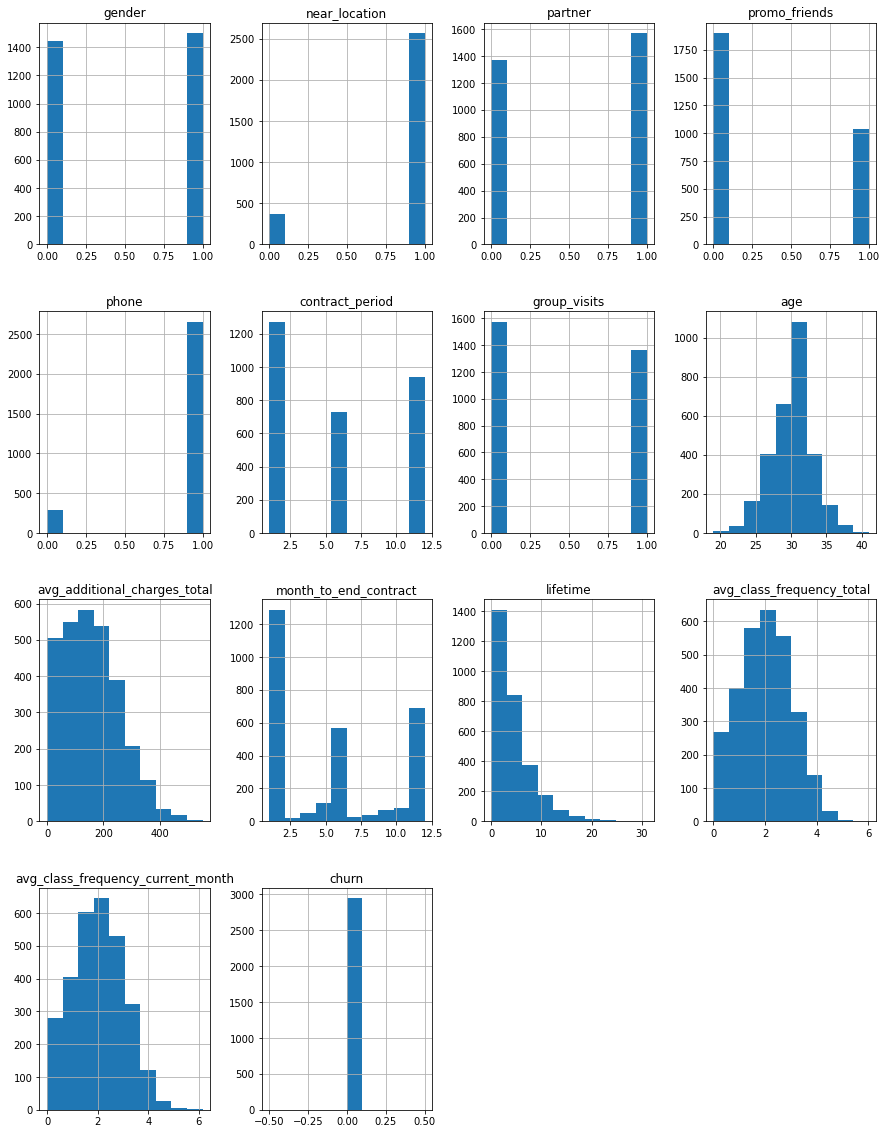

In [9]:
#гистограммы для признаков не оттекших клиентов
df[df['churn']==0].hist(figsize=(15,20))

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'near_location'}>,
        <AxesSubplot:title={'center':'partner'}>,
        <AxesSubplot:title={'center':'promo_friends'}>],
       [<AxesSubplot:title={'center':'phone'}>,
        <AxesSubplot:title={'center':'contract_period'}>,
        <AxesSubplot:title={'center':'group_visits'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'avg_additional_charges_total'}>,
        <AxesSubplot:title={'center':'month_to_end_contract'}>,
        <AxesSubplot:title={'center':'lifetime'}>,
        <AxesSubplot:title={'center':'avg_class_frequency_total'}>],
       [<AxesSubplot:title={'center':'avg_class_frequency_current_month'}>,
        <AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

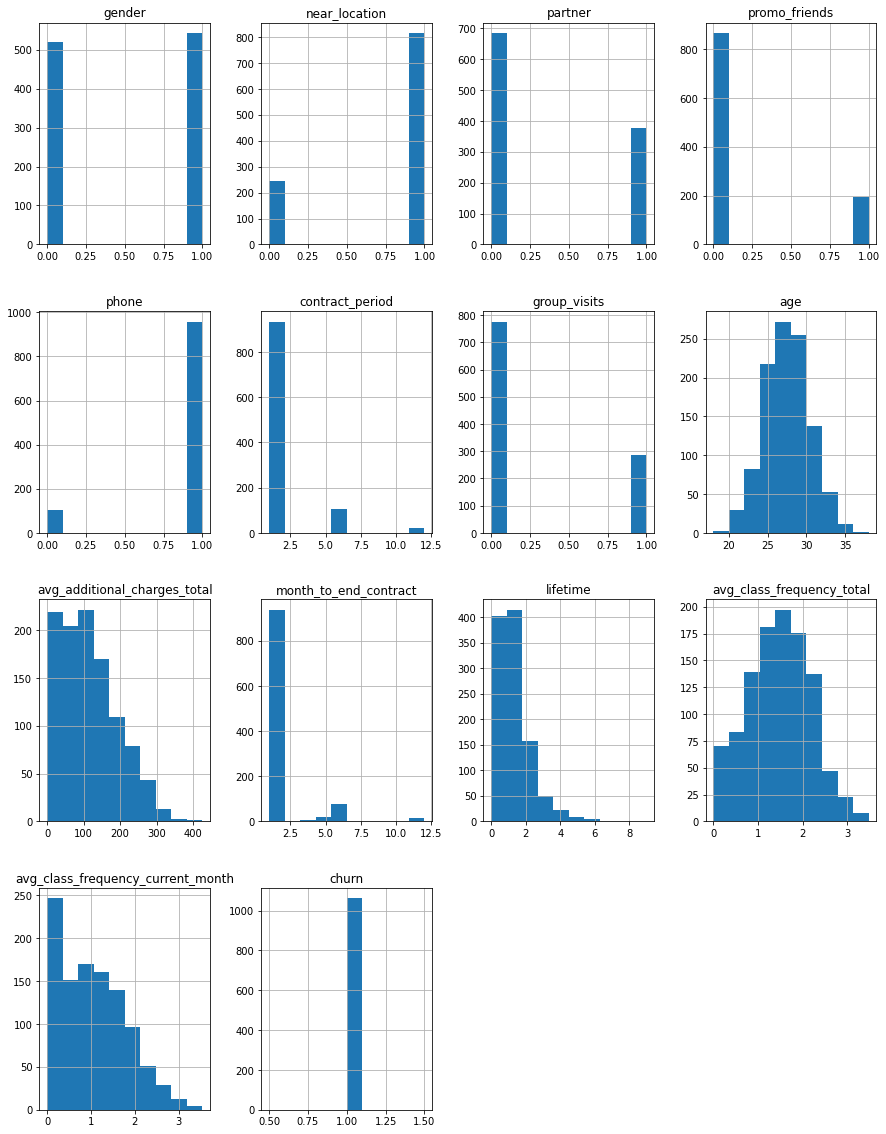

In [10]:
#гистограммы для признаков  оттекших клиентов

df[df['churn']==1].hist(figsize=(15,20))


### точечные гистограммы признаков. Проверка на аномалии.

Text(0.5, 1.0, 'Точечная гистограмма стоимости доп услуг')

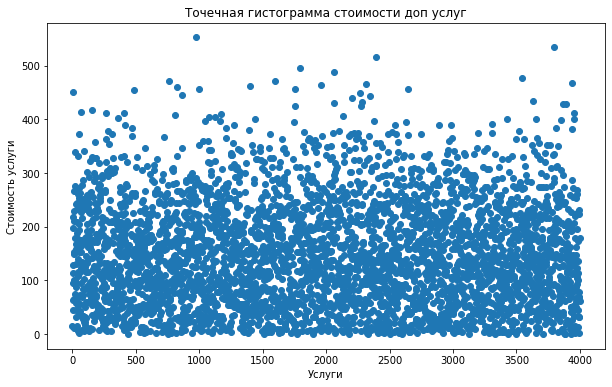

In [11]:
x_values=pd.Series(range(0,len(df)))
plt.figure(figsize=(10,6))
plt.scatter(x_values, df['avg_additional_charges_total'])
plt.ylabel('Стоимость услуги')
plt.xlabel('Услуги')
plt.title('Точечная гистограмма стоимости доп услуг')

На графике стоимостей доп услуг не заметил точек способных поменять масштаб графика своим расположением. Прихожу к выводу что значения в столбце адекватны и аномальных, способных "утащить" за собой среднюю нет.

Text(0.5, 1.0, 'Точечная гистограмма длительности лайфтайма клиента')

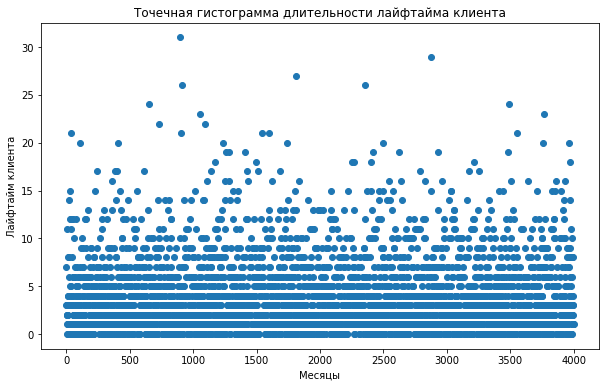

In [12]:
x_values=pd.Series(range(0,len(df)))
plt.figure(figsize=(10,6))
plt.scatter(x_values, df['lifetime'])
plt.ylabel('Лайфтайм клиента')
plt.xlabel('Месяцы')
plt.title('Точечная гистограмма длительности лайфтайма клиента')

Text(0.5, 1.0, 'Тренировки')

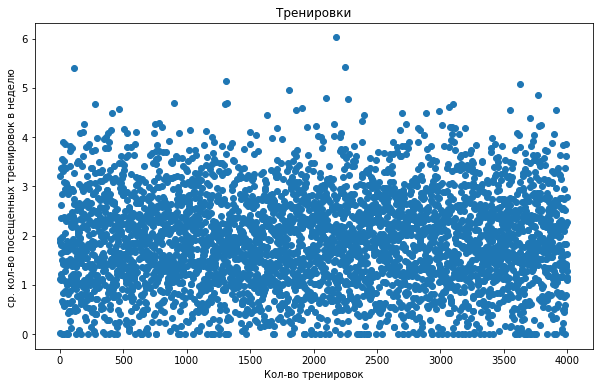

In [13]:
x_values=pd.Series(range(0,len(df)))
plt.figure(figsize=(10,6))
plt.scatter(x_values, df['avg_class_frequency_total'])
plt.ylabel('ср. кол-во посещенных тренировок в неделю ')
plt.xlabel('Кол-во тренировок')
plt.title('Тренировки')

По лайфтайму и кол-ву тренировок так же не увидел никаких значений выбивающихся из реальности.

### Корреляции признаков и тепловая карта.

<AxesSubplot:>

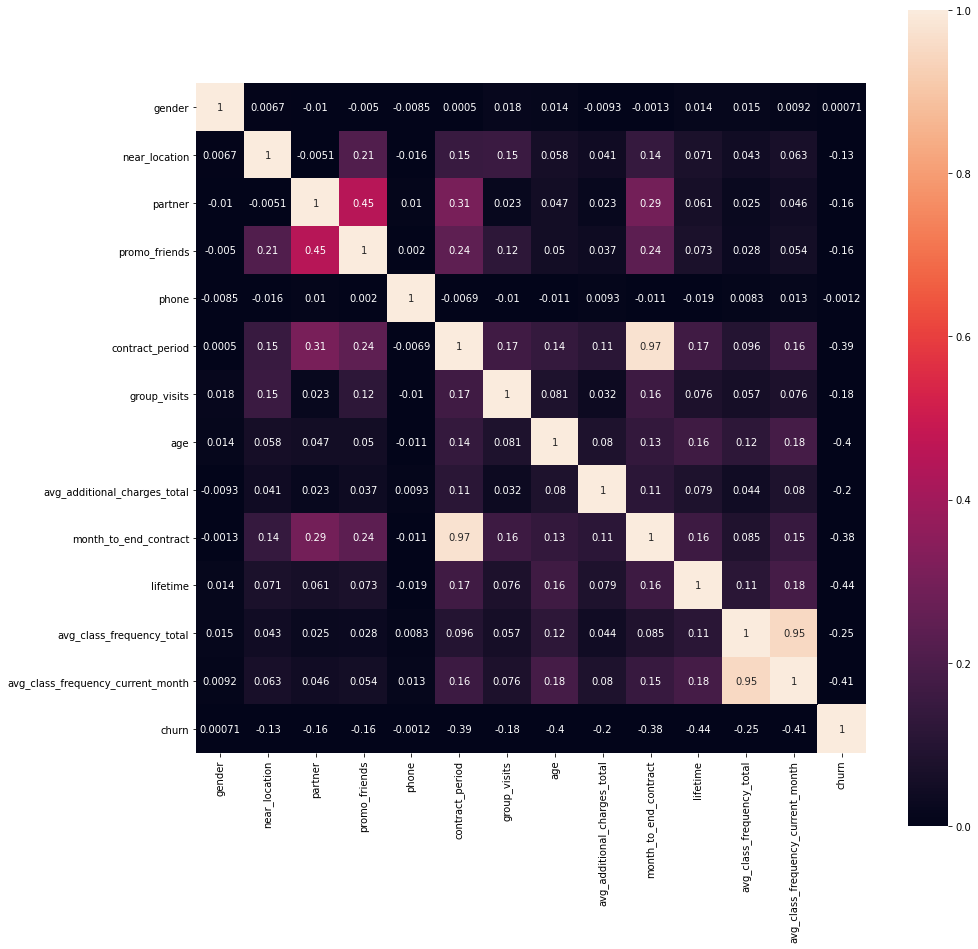

In [14]:
mc=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(mc, annot=True, square=True, vmin=0)

Явная корреляция обнаружена у признаков:
- Выражающих среднего кол-ва посещенных занятий в неделю и среднего кол-ва посещенных занятий в неделю в этом месяце.
- Длительности абонемента и кол-ва месяцев до его конца.
- Признак первоначальной записи в рамках акции «приведи друга» коррелирует с партнерской программой компаний.
- Длительность абонемента корелирует с партнерской программой.
- Длительность абонемента коррелирует с промо "приведи друга".
Остальные признаки имеют слабую корреляцию.

Явная обратная корреляция обнаружена у признака оттока churn:
- чем выше значение lifetime, тем ниже churn(0).
- чем больше кол-во посещенных занятий тем меньше churn
- чем больше срок абонемента тем меньше churn.

## Модель прогнозирования оттока клиентов. Линейная регрессия.

In [15]:
# определяю параметры и целевой признак
X=df.drop('churn', axis=1)
y=df['churn']
X.columns
#соотношение классов далеко от 50/50
y.value_counts() 

0    2939
1    1061
Name: churn, dtype: int64

In [16]:
#разделяю выборку на train и test пропорция 80/20
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# стандартизирую признаки
scaler=StandardScaler()
scaler.fit(X_train)
X_train_st=scaler.transform(X_train)
X_test_st=scaler.transform(X_test)

In [18]:
# Алгоритм модели
lr_model= LogisticRegression(solver='liblinear', random_state=0)
# обучение модели на тестовой выборке
lr_model.fit(X_train_st, y_train)
# прогнозы по валидационной выборке
lr_predictions=lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,lr_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, lr_probabilities)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84
ROC_AUC: 0.97


## Модель прогнозирования оттока клиентов. Случайный лес.

In [19]:
# выбор алгоритма
rf_model=RandomForestClassifier(n_estimators=100, random_state=0)
#обучение модели
rf_model.fit(X_train_st, y_train)
rf_predictions=rf_model.predict(X_test_st)
rf_probabilities=rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))


Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83
ROC_AUC: 0.97


Исходя из того факта, что соотношение классов в данных далеко от 50/50, метрикой Accuracy можно пренебречь. Метрика Precision показывающая успешность предсказывания категории '1' незначительно выше у алгоритма логистической регрессии, как и recall метрика, сводная метрика F1 незначительно больше у лог-ой регрессии, а метрика площади под кривой ошибок ROC_AUC 0.97 у обоих алгоритмов. Делаю вывод, что модели примерно одинаково эффективны, но есть небольшой перевес по метрикам recall, accuracy, F1 в сторону логистичесской регрессии.

## Кластеризация клиентов. Алгоритм K-Means.

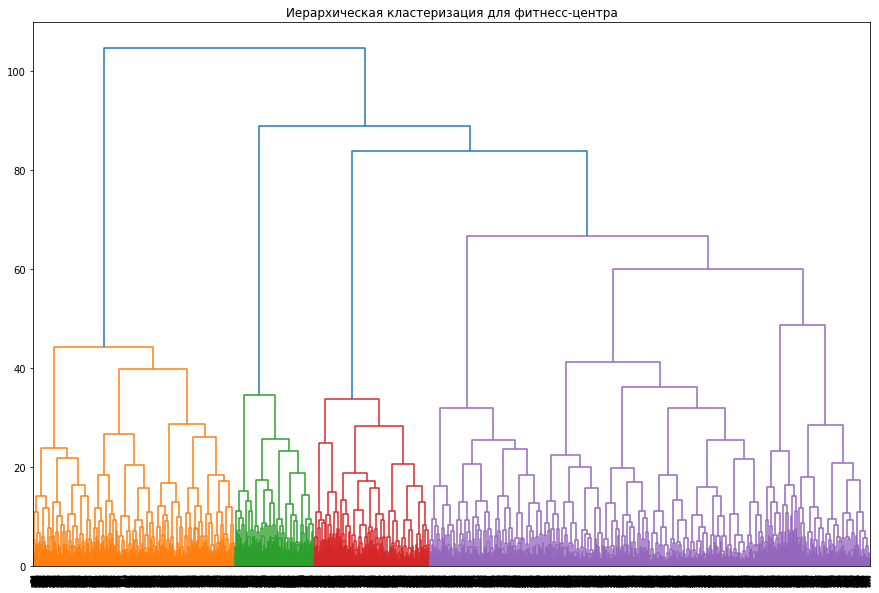

In [29]:
# стандартизирую данные 
X_sc=scaler.fit_transform(df.drop('churn', axis=1))
#построение матрицы расстояний
linked = linkage(X_sc, method = 'ward') 
# отрисовка дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для фитнесс-центра')
plt.show() 

На основании дендрограммы можно выделить 4 разных кластера.

In [48]:
#выбор и обучение модели с анализом средних по кластерам
k_model=KMeans(n_clusters=5,random_state=0)
labels=k_model.fit_predict(X_sc)
df['cluster']=labels
display(df.groupby('cluster').mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Посмотрев бегло на средние по кластерам, можно сказать, что в кластере №0 собраны клиенты с минимальным оттоком и они характеризуются высокой средней посещения занятий, лайфтаймом, запасом неизрасходованного абонемента, суммой покупок доп услуг, высокой средней посещения груповых тренировок, так же это клиенты пришедшие от партнеров и часто привлеченные по промо приведи друга.
Так же есть похожий кластер №4 с низким оттоком с тем лишь различием, что там собраны клиенты с более низким показателем привлечени через промо приведи друга и партнерских программ.
В кластере №3 собраны клиенты с самым высоким средним оттоком. Они характеризуются самым низким средним кол-ом посещенных занятий в неделю, самым низким лайфтаймом, самой низкой ср.суммой доп услуг, самым коротким в среднем по кластеру выбранным абонементом, и одними из самых низких средних по привлечению из партнерских и промо программ.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


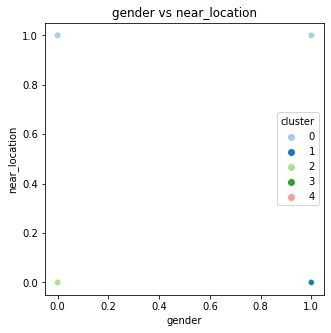

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


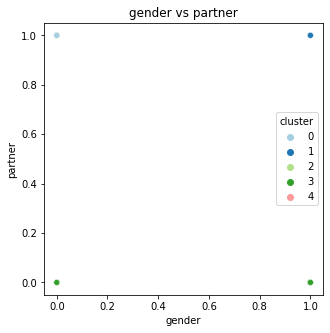

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


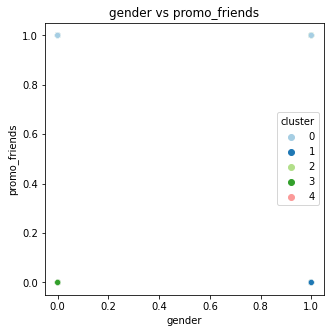

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


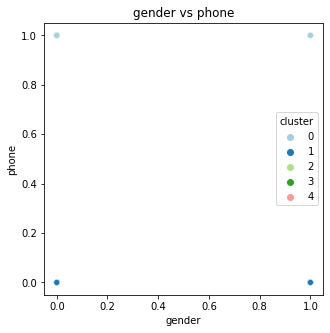

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


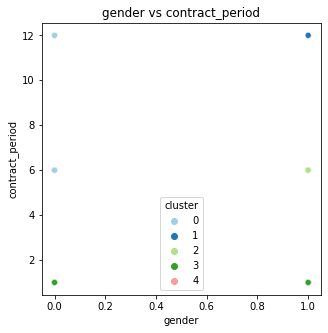

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


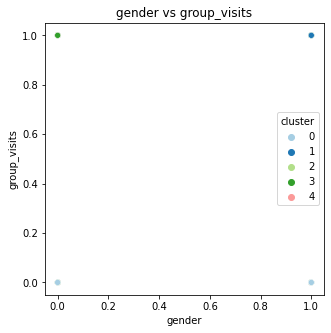

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


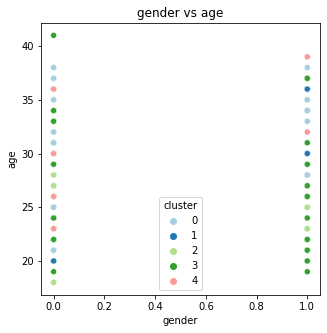

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


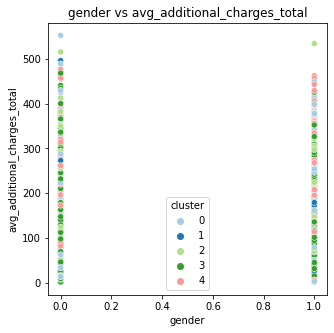

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


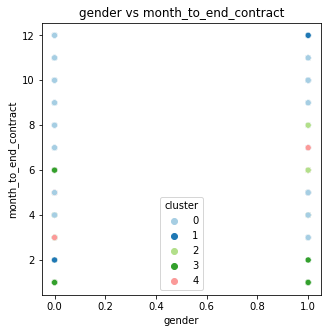

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


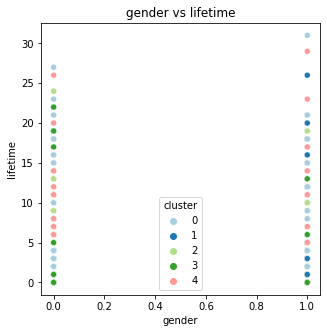

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


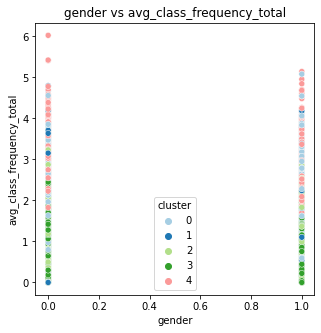

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


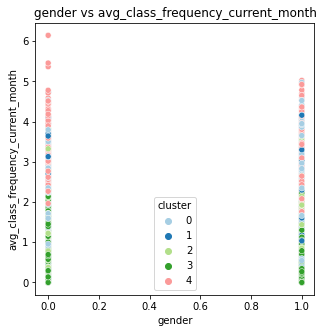

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


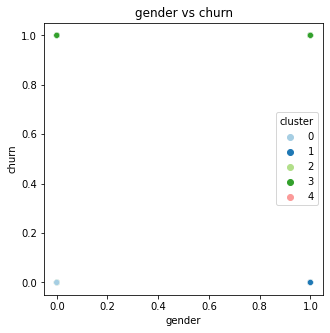

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


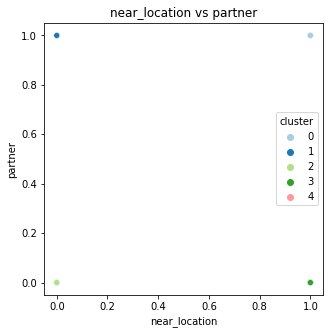

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


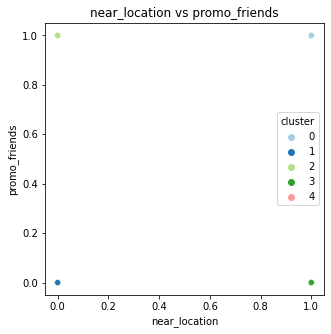

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


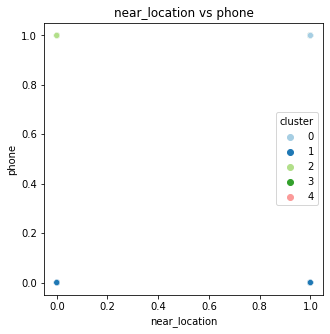

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


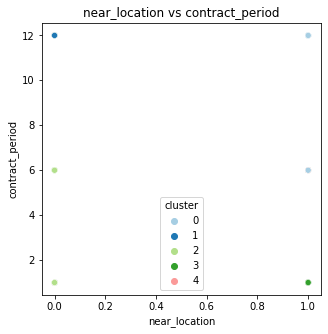

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


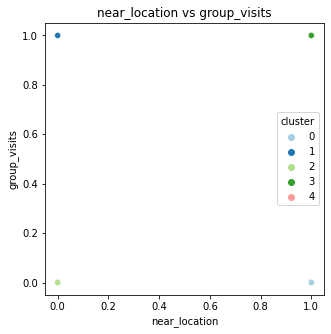

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


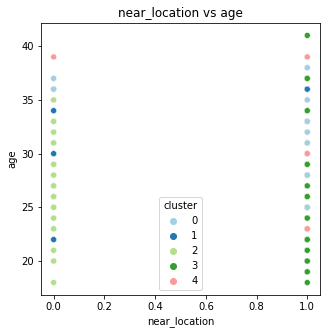

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


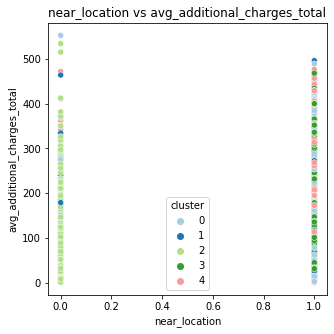

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


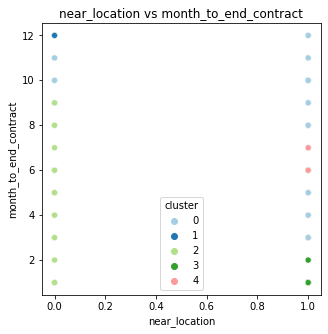

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


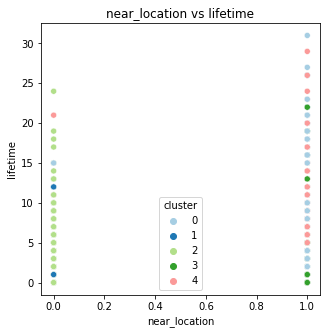

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


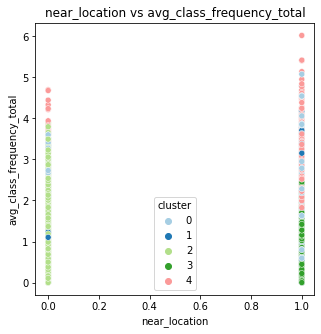

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


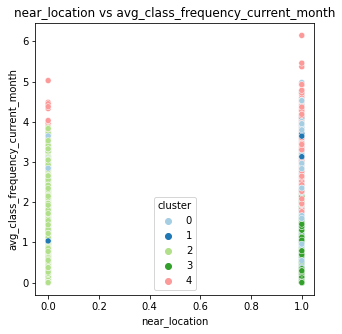

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


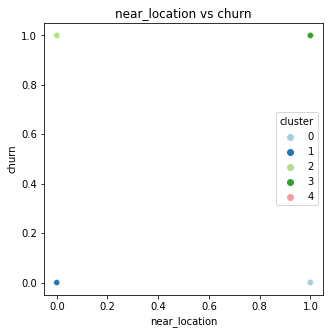

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


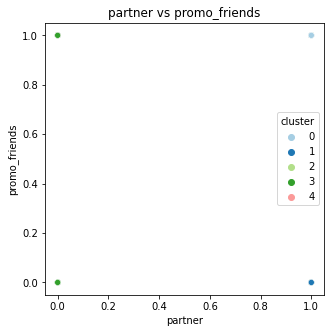

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


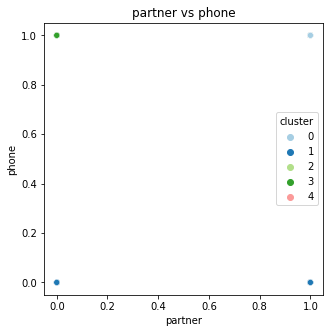

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


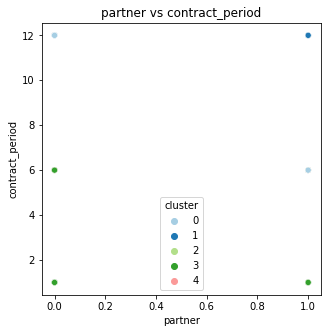

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


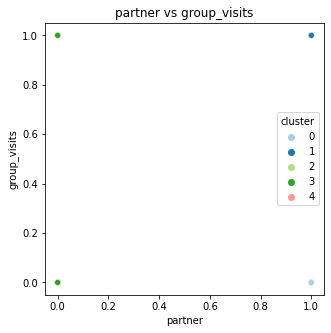

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


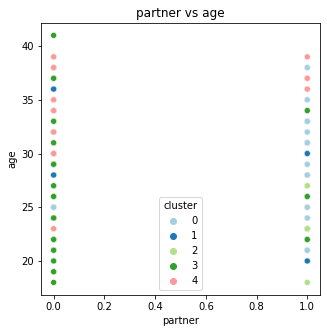

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


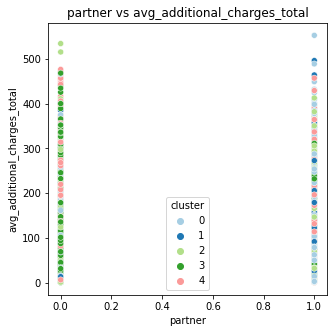

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


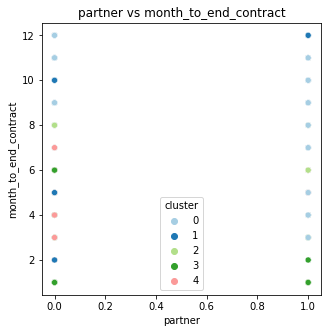

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


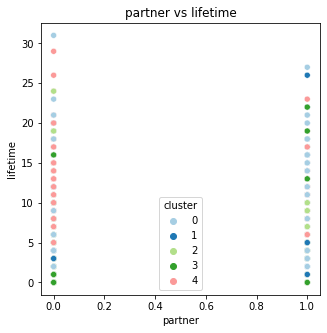

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


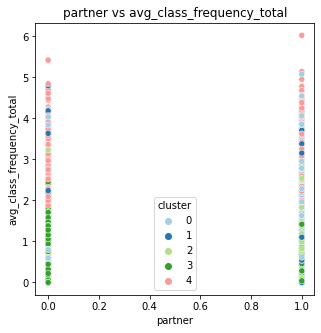

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


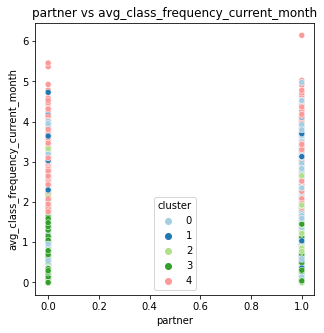

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


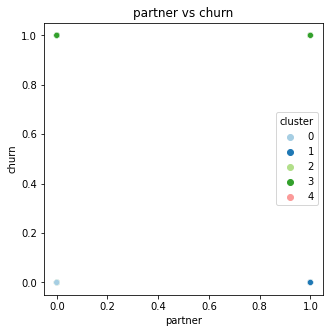

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


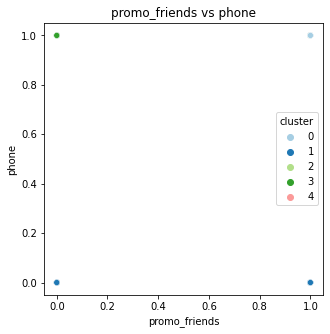

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


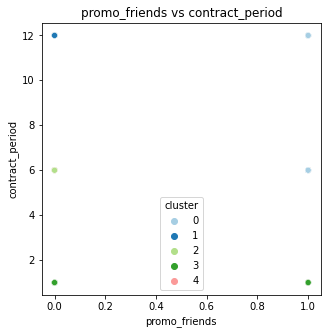

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


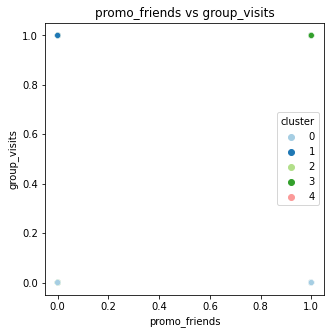

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


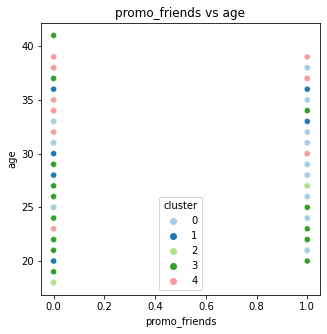

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


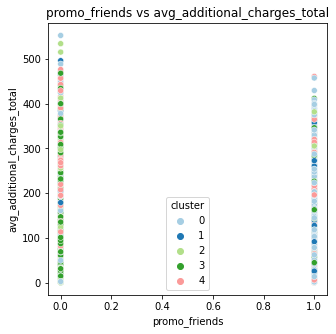

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


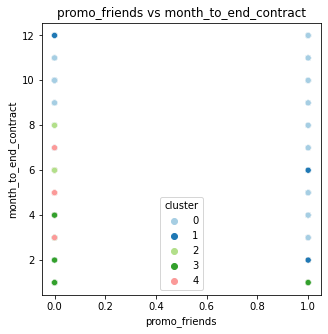

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


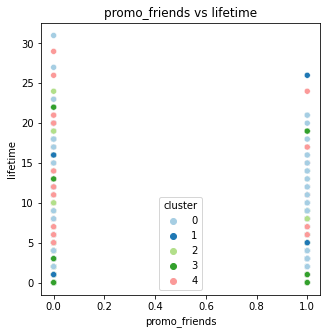

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


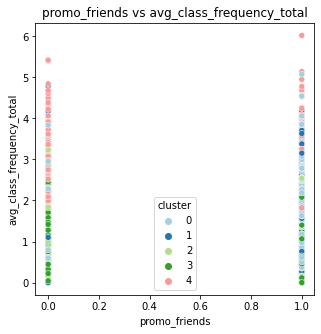

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


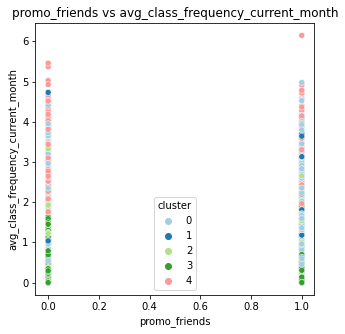

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


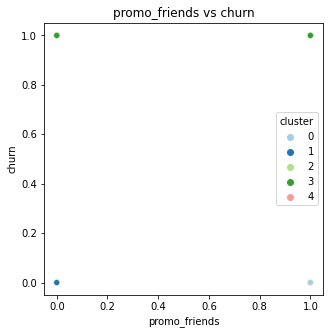

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


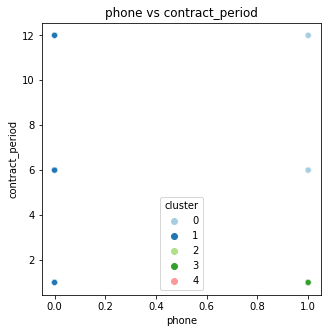

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


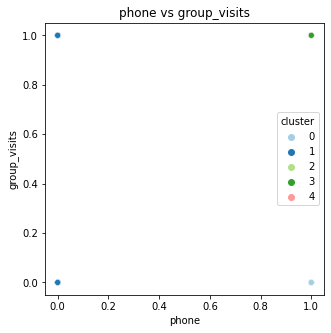

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


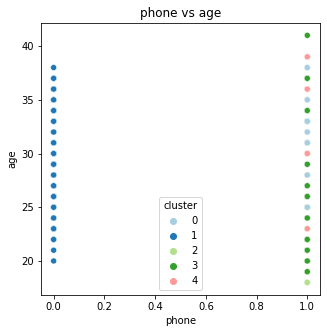

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


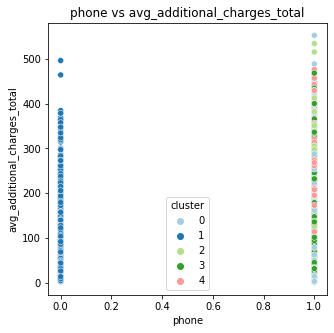

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


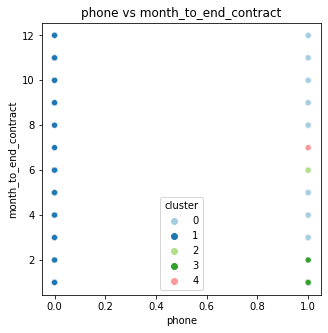

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


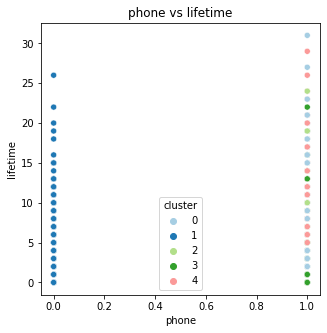

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


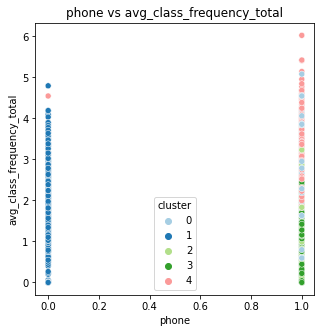

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


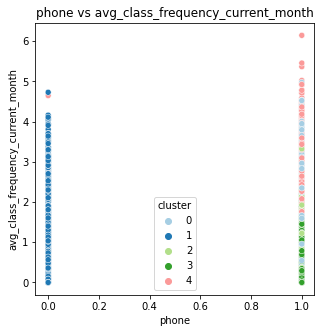

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


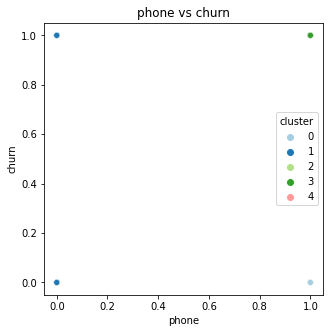

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


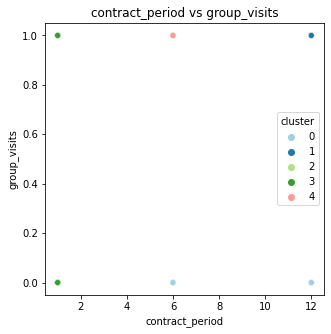

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


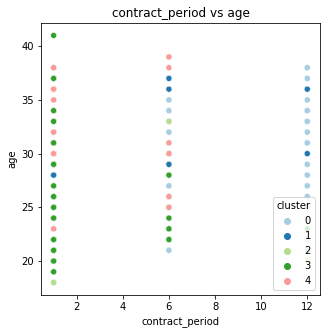

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


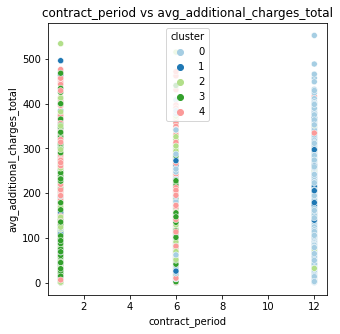

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


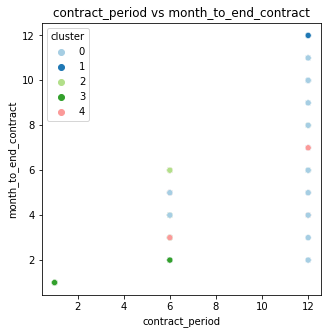

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


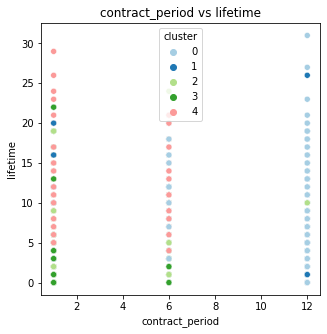

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


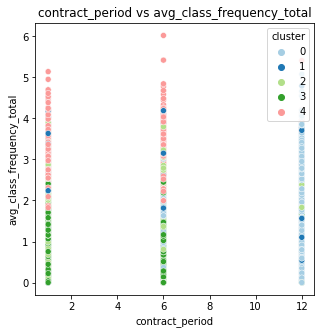

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


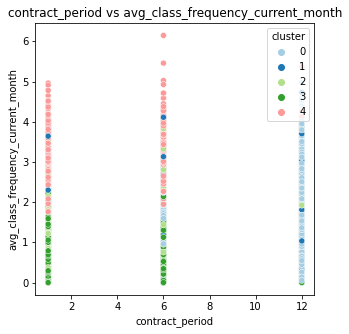

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


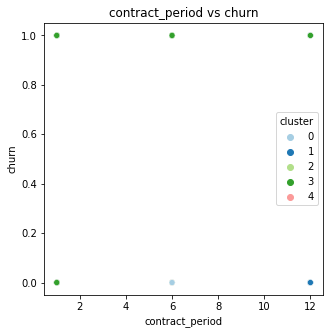

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


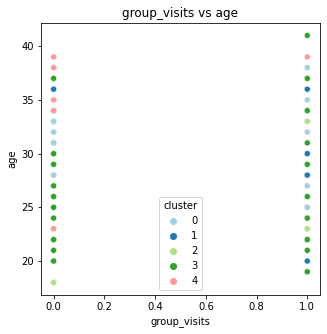

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


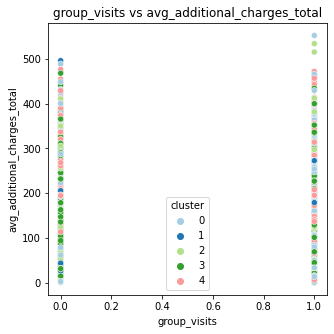

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


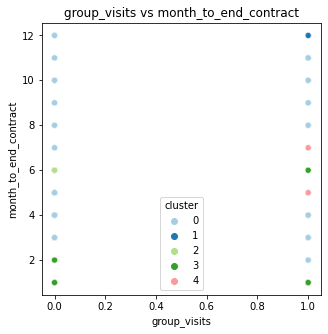

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


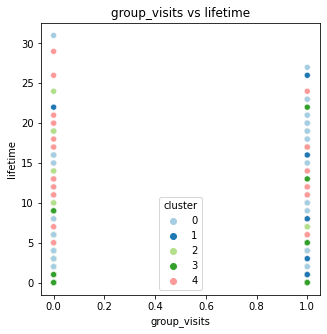

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


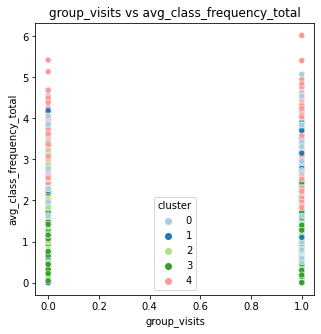

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


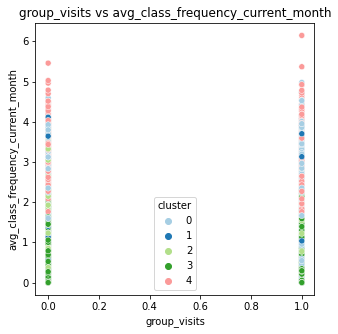

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


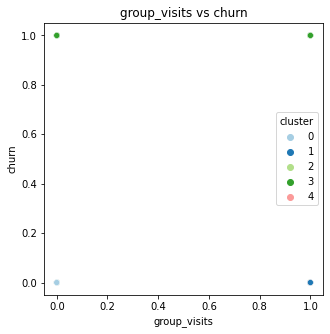

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


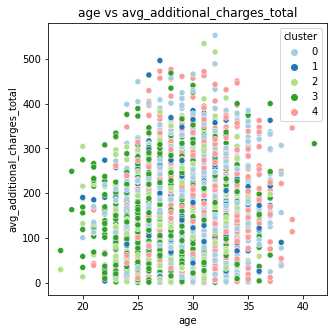

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


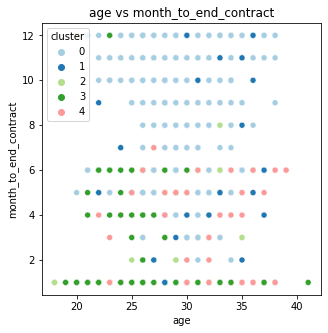

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


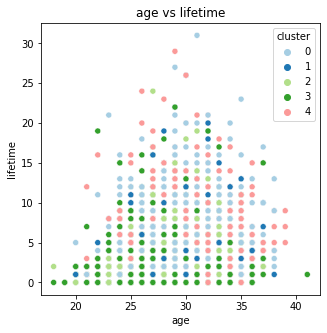

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


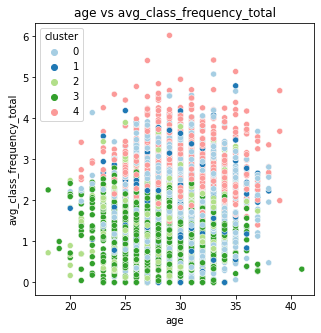

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


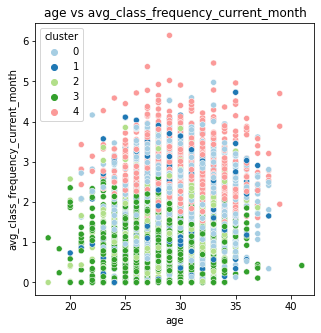

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


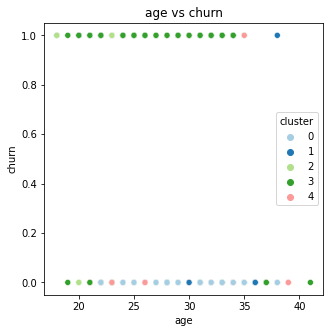

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


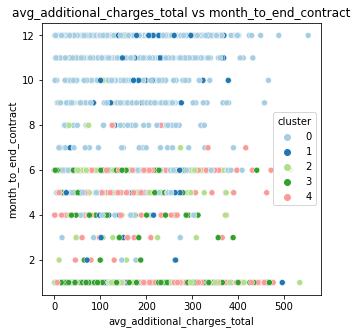

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


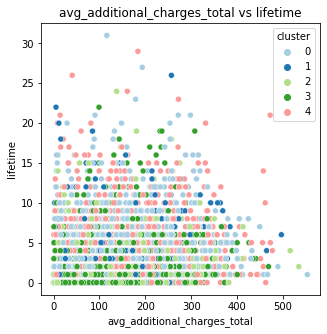

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


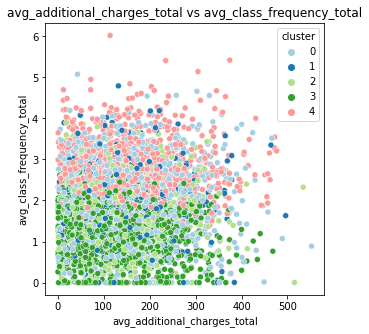

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


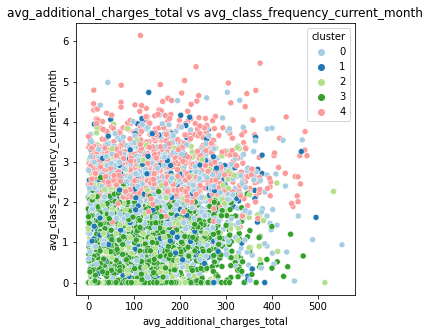

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


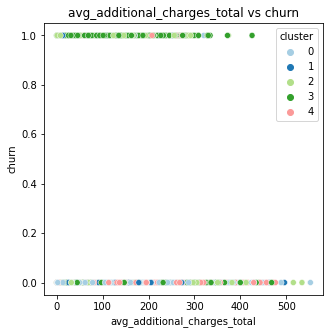

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


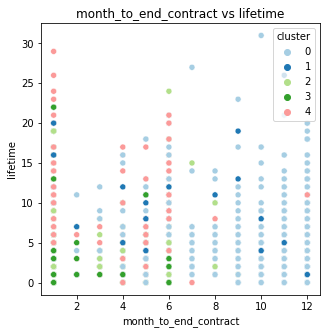

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


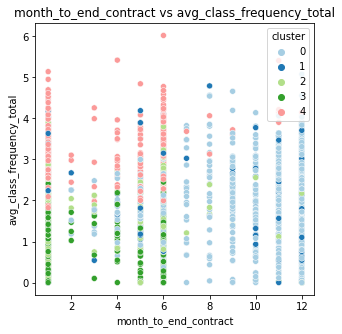

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


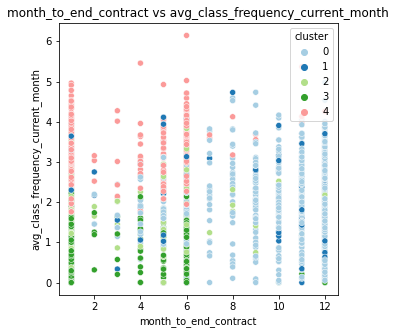

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


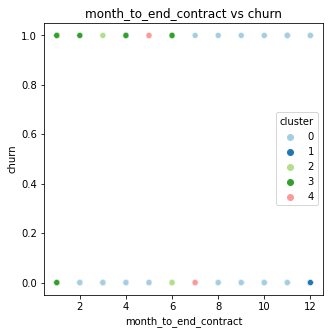

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


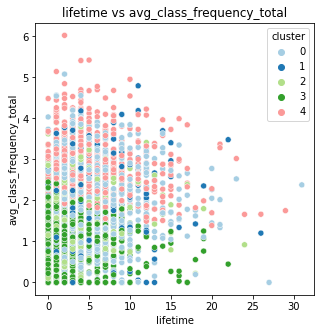

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


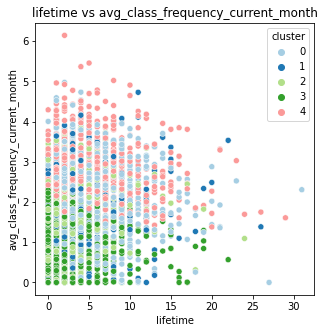

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


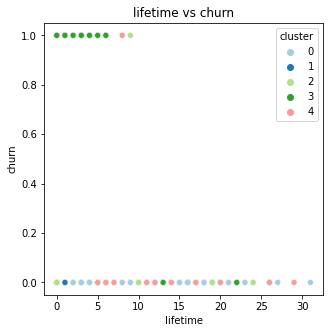

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


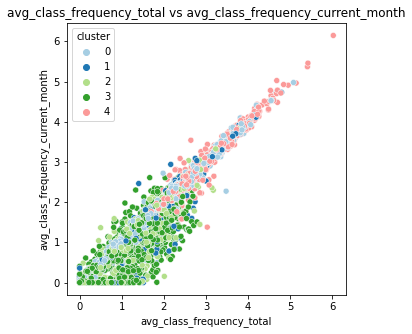

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


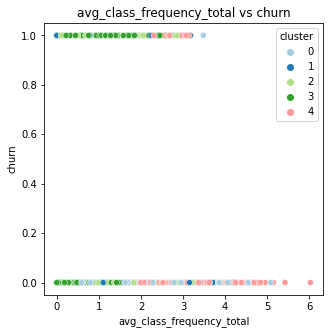

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


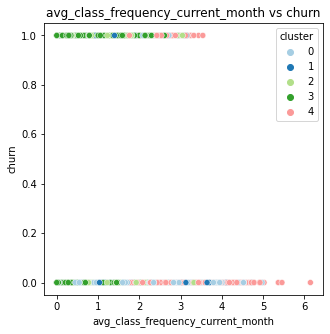

In [41]:
# функция для отрисовки парных графиков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

col_pairs = list(itertools.combinations(df.drop('cluster', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'cluster')

Были замечены те же тенденции, которые я описал при анализе средних по кластерам. Личные впечатления- графики попарного сочетания признаков кластеров, тяжелее интерпретировать, чем числовые значения средних в кластерах.

In [49]:
display(df.groupby('cluster').mean()['churn'])

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64

Кластеры №0 и №4 самые надежные, более склонен к оттоку кластер №1, в кластере №3 и №2 самый высокий отток.

## Вывод по исследованию.

В ходе предобработки данных не были выявленны пропуски и дубликаты. Типы данных столбцов соответствуют целям исследования и применяемым методам и алгоритмам. Названия столбцов были приведены к змеиному регистру.

Исследовательский анализ данных показал, что в данных нет аномальных, искажающих реальную картину наблюдений способных исказить средние значения. Из тепловой карты стало ясно, что в данных присутствует мультиколлениарность, а разделение классов целевого признака отличается от 50/50.

При исследовании поведения алгоритмов логической регрессии и случайного леса был сделан вывод о незначительно большей эффективности логической регрессии, на основоании анализа метрик.

Алгоритм кластеризации вернул 5 кластеров клиентов по уровню оттока, среди которых можно выделить кластеры №0 и №4 как самые надежные, более склонен к оттоку кластер №1, в кластере №3 и №2 самый высокий отток. 

Общие рекомендации по работе с клиентами:
1. Продолжать использовать промо активности и партнерские программы. Увеличить их использование.
2. Продумать концепцию повышения привлекательности более долгих абонементов, клиенты с большим лайфтаймом лучше удерживаются.
3. Сделать более доступными и удобными к посещению групповые тренировки.
4. Внедрить концепцию более дешевого продления/покупки следующего абонемента, при условии, что текущий еще не израсходован. Больший запас абонемента удерживает клиента. Никто не хочет чтоб абонемент "сгорел".
5. Разработать и внедрить новые доп услуги. Привяжет большее кол-во клиентов к основной услуге.
6. Разработать систему мотивации для клиентов, которые посещают тренировки от 3 раз в неделю.

***